# The economic effect of the CETA on EU and Canada: a comparative analysis

The Comprehensive Economic and Trade Agreement is a free-trade agreement between Canada, the European Union, and its member states. CETA has been provisionally applied since 21 September 2017. The treaty has eliminated 98% of the tariffs between Canada and the EU.

This article aims to use international trade and investment indicators to practice visualization with Python and not to make firm conclusions about CETA effects. First of all, the agreement has only been in force for two years, and data for 2019 is not yet available. Moreover, such an analysis should include a comparison of economic indicators between EU member states and across different industries, as well as account for economic growth, price changes and other confounding factors.

### Research questions:

- How has CETA affected trade in goods between Canada and EU member countries? 
- How has CETA affected capital stocks?

In [5]:
#import Python libraries and download data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eu_trade = pd.read_csv('EU_imports.csv', sep=';') #data sourse: ITC
can_trade = pd.read_csv('CAN_imports.csv', sep=';') #data sourse: ITC
intro_eu_trade = pd.read_csv('intro_EU.csv', sep=';') #data sourse: ITC
fdi = pd.read_csv('FDI_CAN.csv', sep=';') #data sourse: Canada Statistics
eu_fdi = pd.read_csv('eu_fdi_out.csv', sep=';') #data sourse: OECD

## Trade in goods

These indicators will be used to determine the economic effect of CETA on trade between the EU and Canada:
- Exports from the EU to Canada in USD terms
- Exports from Canada to the EU in USD terms
- Exports from Canada to the world
- Canada imports from the world
- Exports from the EU to the world
- EU imports from the world

This data also will be used to determine:
- Growth of Canadian exports to the EU
- Growth of European exports to Canada
- Share of EU in Canadian imports
- Share of EU in Canadian exports
- Share of Canada in European imports
- Share of Canada in European exports

In [6]:
## defining dataframes

time_series = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018] 

#canadian imports from EU in thousand USD dollars
can_imp_eu_t = can_trade.iloc[:1, 2:12].transpose() 

#canadian imports from world in thousand USD dollars
can_imp_world_t = can_trade.iloc[:1, 22:32].transpose() 

#european imports from Canada in thousand USD dollars
eu_imp_can_t = eu_trade.iloc[:1, 2:12].transpose() 

#european imports from world in thousand USD dollars
can_exp_world_t = eu_trade.iloc[:1, 12:22].transpose() 

## formating from thousand US Dollars to billions

# canadian imports from EU
can_imp_eu = pd.DataFrame()
can_imp_eu['value'] = can_imp_eu_t.iloc[:,0].values / 10000000 

#canadian imports from world
can_imp_world = pd.DataFrame()
can_imp_world['value'] = can_imp_world_t.iloc[:,0].values / 10000000

#european imports from Canada
eu_imp_can = pd.DataFrame()
eu_imp_can['value'] = eu_imp_can_t.iloc[:,0].values / 10000000

#european imports from world
can_exp_world = pd.DataFrame()
can_exp_world['value'] = can_exp_world_t.iloc[:,0].values / 10000000

## extracting intro EU trade from EU exports to the world and EU imports from the world 
## and formating from thousand US Dollars to billions

intro_eu = intro_eu_trade.iloc[:1, 2:12].transpose()
eu_imp_world_incl_eu = eu_trade.iloc[:1, 22:32].transpose()
eu_exp_world_incl_eu = can_trade.iloc[:1, 12:22].transpose()
eu_imp_world = pd.DataFrame()
eu_imp_world['value'] = (eu_imp_world_incl_eu.iloc[:,0].values - intro_eu.iloc[:,0].values) / 10000000
eu_exp_world = pd.DataFrame()
eu_exp_world['value'] = (eu_exp_world_incl_eu.iloc[:,0].values - intro_eu.iloc[:,0].values) / 10000000

## calculating shares in trade

eu_share_can_im = (can_imp_eu.iloc[:,0].values / can_imp_world.iloc[:,0].values) 
eu_share_can_exp = (eu_imp_can.iloc[:,0].values / can_exp_world.iloc[:,0].values) 

can_share_eu_im = (eu_imp_can.iloc[:,0].values / eu_imp_world.iloc[:,0].values)
can_share_eu_exp = (can_imp_eu.iloc[:,0].values / eu_exp_world.iloc[:,0].values)

## Exports

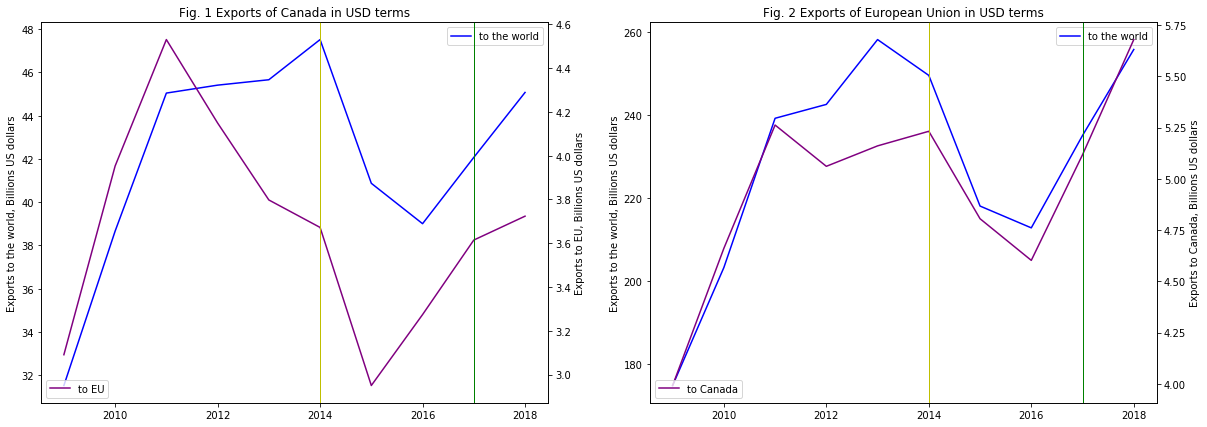

In [132]:
fig, (ax_can, ax_eu) = plt.subplots(1,2, sharex='all', figsize=(20,7))

# Exports of Canada in USD terms

lns1 = ax_can.plot(time_series, can_exp_world, color='blue',label='to the world')
ax_can.set_ylabel('Exports to the world, Billions US dollars')
ax_can.legend(loc=0)

ax_can2 = ax_can.twinx() 
lns2 = ax_can2.plot(time_series, eu_imp_can, color='purple',label='to EU')
ax_can2.set_ylabel('Exports to EU, Billions US dollars')
ax_can2.tick_params(axis='y')
ax_can2.legend(loc='lower left')

lns3 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns4 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)
plt.title('Fig. 1 Exports of Canada in USD terms')


# Exports of European Union in USD terms

lns5 = ax_eu.plot(time_series, eu_exp_world, color='blue',label='to the world')
ax_eu.set_ylabel('Exports to the world, Billions US dollars')
ax_eu.legend(loc=0)

ax_eu2 = ax_eu.twinx() 
lns6 = ax_eu2.plot(time_series, can_imp_eu, color='purple',label='to Canada')
ax_eu2.set_ylabel('Exports to Canada, Billions US dollars')
ax_eu2.tick_params(axis='y')
ax_eu2.legend(loc='lower left')

lns7 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns8 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)
plt.title('Fig. 2 Exports of European Union in USD terms')

plt.show()

The exports of both Canada and the EU grew between 2017 and 2018.
However, the increase of Canadian exports to the EU started in 2015 and, it seems that after the provisional application of CETA, growth was even slower than in previous years. Additionally, it grew even at a slower rate than the growth of Canadian exports to the world during that period.

European exports to Canada, on the other hand, grew faster than European exports to the world. However, growth was the same as the year before application.

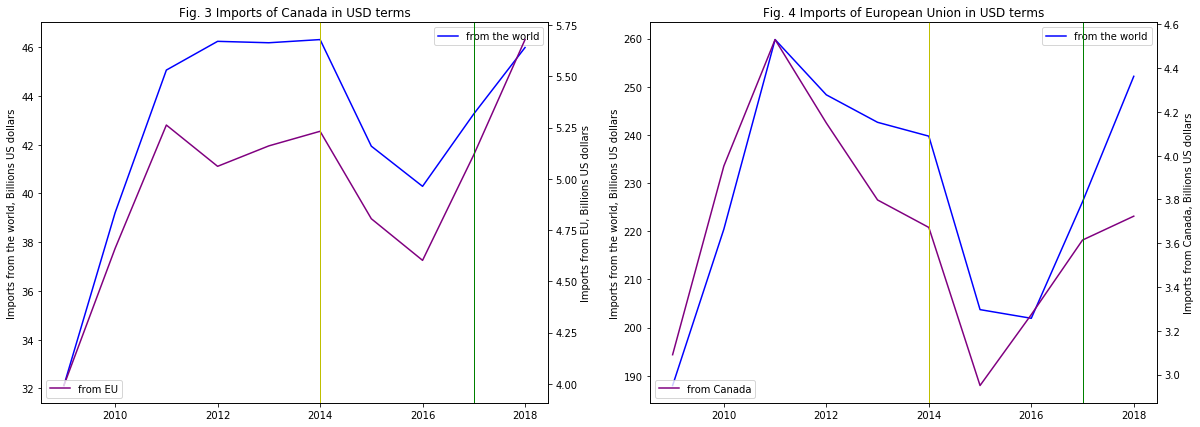

In [160]:
fig, (ax_can, ax_eu) = plt.subplots(1,2, sharex='all', figsize=(20,7))

# Imports of Canada in USD terms

lns1 = ax_can.plot(time_series, can_imp_world, color='blue',label='from the world')
ax_can.set_ylabel('Imports from the world, Billions US dollars')
ax_can.legend(loc=0)

ax_can2 = ax_can.twinx() 
lns2 = ax_can2.plot(time_series, can_imp_eu, color='purple',label='from EU')
ax_can2.set_ylabel('Imports from EU, Billions US dollars')
ax_can2.tick_params(axis='y')
ax_can2.legend(loc='lower left')

lns3 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns4 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)
plt.title('Fig. 3 Imports of Canada in USD terms')

# Imports of EU in USD terms

lns5 = ax_eu.plot(time_series, eu_imp_world, color='blue',label='from the world')
ax_eu.set_ylabel('Imports from the world, Billions US dollars')
ax_eu.legend(loc=0)

ax_eu2 = ax_eu.twinx() 
lns6 = ax_eu2.plot(time_series, eu_imp_can, color='purple',label='from Canada')
ax_eu2.set_ylabel('Imports from Canada, Billions US dollars')
ax_eu2.tick_params(axis='y')
ax_eu2.legend(loc='lower left')

lns7 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns8 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)
plt.title('Fig. 4 Imports of European Union in USD terms')

plt.show()

Canadian imports from the EU grew faster than Canadian imports from the world, which can indicate a positive impact of CETA. As for European imports, after application increase in imports from the world was considerably bigger than an increase in imports from Canada.

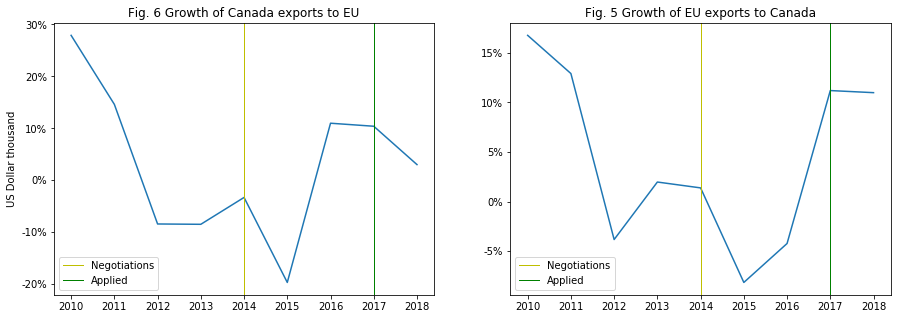

In [158]:
plt.figure(figsize=(15,5))

# Growth of Canada exports to EU calculated using pct_change() method 

plt.subplot(1,2,1)

plt.plot(time_series, eu_imp_can.pct_change())
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
plt.title("Fig. 6 Growth of Canada exports to EU")
plt.ylabel("US Dollar thousand")
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

# Growth of EU exports to Canada

plt.subplot(1,2,2)
plt.plot(time_series, can_imp_eu.pct_change())
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
plt.title("Fig. 5 Growth of EU exports to Canada")
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

plt.show()

The growth rate of exports decreased after the provisional application of CETA. 

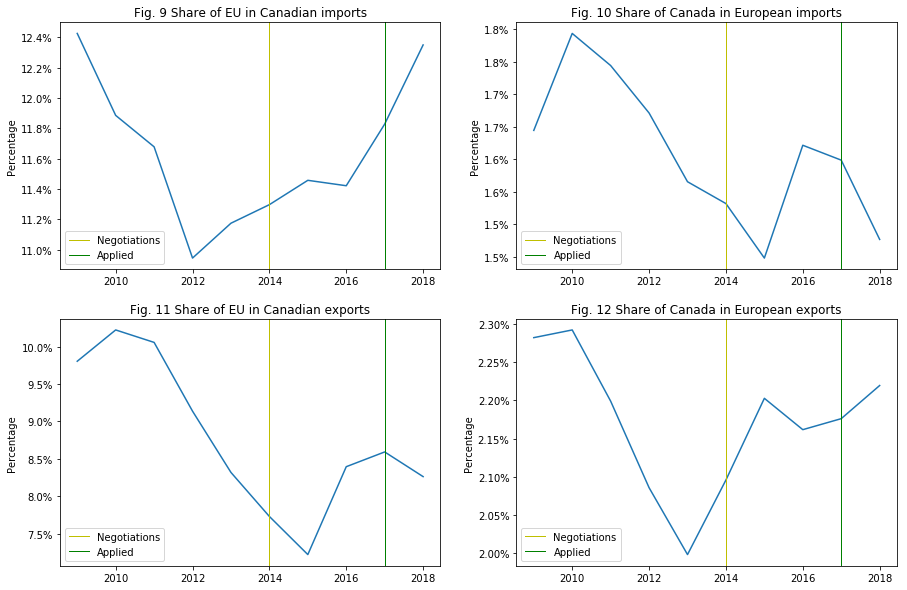

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(time_series, eu_share_can_im)
plt.title("Fig. 9 Share of EU in Canadian imports")
plt.ylabel("Percentage")
plt.gca().set_yticklabels(['{:.1%}'.format(x) for x in plt.gca().get_yticks()])
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

plt.subplot(2,2,2)
plt.plot(time_series, can_share_eu_im)
plt.title("Fig. 10 Share of Canada in European imports")
plt.ylabel("Percentage")
plt.gca().set_yticklabels(['{:.1%}'.format(x) for x in plt.gca().get_yticks()])
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

plt.subplot(2,2,3)
plt.plot(time_series, eu_share_can_exp)
plt.title("Fig. 11 Share of EU in Canadian exports")
plt.gca().set_yticklabels(['{:.1%}'.format(x) for x in plt.gca().get_yticks()])
plt.ylabel("Percentage")
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

plt.subplot(2,2,4)
plt.plot(time_series, can_share_eu_exp)
plt.title("Fig. 12 Share of Canada in European exports")
plt.gca().set_yticklabels(['{:.2%}'.format(x) for x in plt.gca().get_yticks()])
plt.ylabel("Percentage")
plt.axvline(2014, color='y', linestyle='solid', linewidth=1, label="Negotiations")
plt.axvline(2017, color='g', linestyle='solid', linewidth=1, label="Applied")
plt.legend()

plt.show()

Share of EU in Canadian exports and share of Canada in European imports declined, which implies that European consumers purchased fewer Canadian goods, and Canada sold fewer goods to the EU. However, there is insufficient evidence to imply causation. 

The share of European goods in Canadian imports rose as well as the share of Canada in European exports. Data shows that Canadian consumers bought more European goods, and the EU sold more goods to Canada. Again, the conclusion of causality can not be made.

## Conclusions

The trade in goods between the EU and Canada continued to grow in absolute terms after the provisional application of CETA in 2017. However, it can not be stated with certainty whether this growth is attributed to trade liberalization because of CETA. The growth of most indicators was not higher than in previous years or compared to the growth of overall trade in goods, in some cases even slower than that. The effect was visible only in Canadian imports from the EU. Although the growth rate of European exports to Canada did not increase compared to the previous year, it grew at a faster rate than Canadian imports from the world.

The same situation is seen when the trade partner's share is considered. We see an increase in the share of EU in Canadian imports, as well as an increase in Canada's share in European exports. At the same time, the share of EU in Canadian exports and share of Canada in European imports declined.

## FDI

In [7]:
can_stock_world = fdi.iloc[0:10,[0,4,7,11]]
can_stock_eu = fdi[fdi['Canadian and foreign direct investment'] == 'Canadian direct investment abroad - Total Book Value'].iloc[10:,[0,4,7,11]]
eu_stock_can = fdi[fdi['Canadian and foreign direct investment'] == 'Foreign direct investment in Canada - Total Book Value'].iloc[10:,[0,4,7,11]]
                    
# from millions to 100 billions

can_stock_world['VALUE'] = can_stock_world['VALUE'] / 100000
can_stock_eu['VALUE'] = can_stock_eu['VALUE'] / 100000
eu_stock_can['VALUE'] = eu_stock_can['VALUE'] / 100000
eu_fdi['tn'] = eu_fdi['Value'] / 1000000

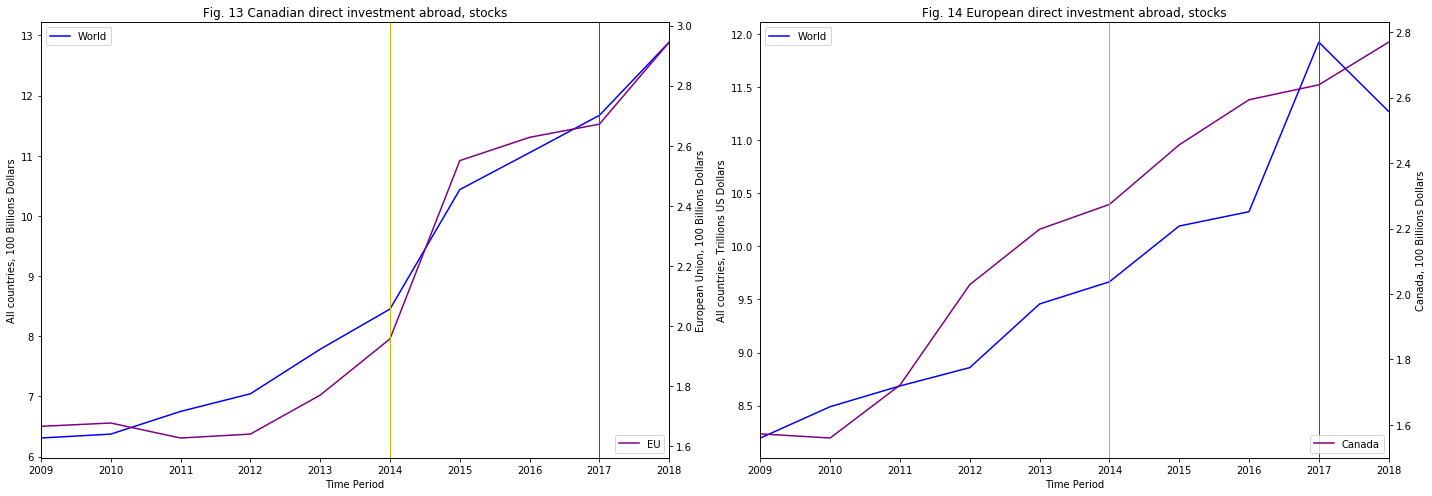

In [8]:
fig, (ax_can, ax_eu) = plt.subplots(1,2, sharex='all', figsize=(20,7))

# Canadian direct investment abroad, stocks

lns5 = ax_can.plot(time_series, can_stock_world['VALUE'], color='blue',label='World')
ax_can.set_ylabel('All countries, 100 Billions Dollars')
ax_can.set_xlabel('Time Period')
ax_can.legend(loc='upper left')

ax_can2 = ax_can.twinx() 
lns6 = can_stock_eu.groupby('REF_DATE')['VALUE'].sum().plot(ax=ax_can2, color='purple',label='EU')
ax_can2.set_ylabel('European Union, 100 Billions Dollars')
ax_can2.tick_params(axis='y')
ax_can2.legend(loc='lower right')

lns7 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns8 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)
plt.title('Fig. 13 Canadian direct investment abroad, stocks')

fig.tight_layout()

# European direct investment abroad, stocks

lns1 = ax_eu.plot(time_series, eu_fdi['tn'], color='blue',label='World')
ax_eu.set_ylabel("All countries, Trillions US Dollars")
ax_eu.set_xlabel('Time Period')
ax_eu.legend(loc='upper left')

ax_eu2 = ax_eu.twinx() 
lns2 = eu_stock_can.groupby('REF_DATE')['VALUE'].sum().plot(ax=ax_eu2, color='purple',label='Canada')
ax_eu2.set_ylabel('Canada, 100 Billions Dollars')
ax_eu2.tick_params(axis='y')
ax_eu2.legend(loc='lower right')

lns3 = plt.axvline(2014, color='y', linestyle='solid', linewidth=1)
lns4 = plt.axvline(2017, color='g', linestyle='solid', linewidth=1)

plt.title('Fig. 14 European direct investment abroad, stocks')
fig.tight_layout()

plt.show()

While EU experienced foreign direct investment retrenchment and portfolio investment slowdown, [according to European Central bank](https://www.ecb.europa.eu/pub/economic-bulletin/focus/2019/html/ecb.ebbox201904_01~0574afd433.en.html), investment to Canada grew. It is the most visible positive difference in economic relationships between the two countries before and after CETA.

We also see a slightly faster growth rate of Canadian investments in the EU than Canadian investments in the world.

## Further questions

Since the CETA has only been in effect for two years, it would be more suitable to conduct such analysis when the data for 2019 is available. As was mentioned in the introduction, this article would benefit from evaluating the commodity composition of exports to determine whether some industries benefitted from the agreement more than others and which suffered. Another important research question would be: what are the differences in effects on countries of the European Union?

Since opponents of CETA predicted that the agreement would weaken European consumer rights and bring unemployment and environmental damage, it would also be a valuable adjunct to the analysis to evaluate relevant indicators of these possible adverse effects.

Sourses of data: [Trade Map by ITC](https://www.trademap.org/Product_SelCountry_TS.aspx?nvpm=1%7c124%7c%7c%7c%7cTOTAL%7c%7c%7c2%7c1%7c1%7c1%7c2%7c1%7c1%7c1%7c1), [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3610000801), [OECD](https://data.oecd.org/fdi/fdi-stocks.htm) 